## **K-means Clustering: Recap**

Let us quickly recap what we just learnt about the k-means clustering algorithm.
You can access more information from this session at https://bit.ly/introtoadvml-week2-slides.

### **What is K-Means Clustering?**

- It is a common clustering technique, helps to solve many problems efficiently.
- It is one of the simplest and popular unsupervised machine learning algorithms.
- It is a common technique for statistical data analysis.

> **The objective of K-means is simple.** It is to group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.

In other words, the K-means algorithm **identifies** k number of centroids, and then **allocates** every data point to the nearest cluster. The **‘means’** in the K-means refers to averaging of the data; that is used to find the centroid.

### **How does it work?**
To cluster a set of data-points, the algorithm starts by randomly initializing centroids for k clusters and iteratively updating the positions of the centroids to best split the data-points.

**1. Cluster Assignment**
<br>
The algorithm goes through every data-point and depending on which cluster centroid is closer, it assigns the data points to one of the cluster centroids.

**2. Centroid Updation**
<br>
The algorithm moves the centroids to the average of the points in a cluster. In other words, the algorithm calculates the average of all the points in a cluster and moves the centroid to that average location. This process is repeated until there is no change in the clusters (ie, converges). 

K is chosen randomly or by giving specific initial starting points.
<br>

![Clustering Steps](https://astrostatistics.psu.edu/su09/lecturenotes/image/kmall.png)

### **Cluster Quality**
Our goal here is not just to make many clusters but to make the most meaningful clusters. We can measure the quality of clusters using a metric called Interia. 

* **Inertia** is the average distortion of the clusters. 
* **Distortion** is calculated at the cluster level. For each cluster, it calculates the sum of squared "error" where error is considered as the distance of a every datapoint from its cluster centroid.

Think about this, if we have 500 data-points, the model can create 500 clusters, thus making distortion zero and the "best quality". Measuring the performance just based on distortion is not good enough. Therefore, picking 'k' is a very important step in building a clustering model.

### **How do we choose 'k'?**
A fundamental step for any clustering algorithm is to determine the optimal number of clusters (k) into which the data may be clustered.

<div>
<img src="https://user-images.githubusercontent.com/42711978/87970313-2c6cc680-cae1-11ea-865b-a775d7d06ec1.png" width="400"/>
</div>

**WCSS** is an ideal way to figure out the right number of clusters would be to calculate the Within-Cluster-Sum-of-Squares (WCSS). WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids. The objective is to minimise this value.
<br>

<div>
<img src="https://www.researchgate.net/profile/Chirag_Deb/publication/320986519/figure/fig8/AS:560163938422791@1510564898246/Result-of-the-elbow-method-to-determine-optimum-number-of-clusters.png" width="500"/>
</div>

The Elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and records the avearage distortion for each of these k values. We expect this graph to produce a long-tail (as we increase the clusters, the distortions will reduce) and the goal is to identify the "elbow" which optimizes the number of clusters without overfitting.

You can access more information from this session at https://bit.ly/introtoadvml-week2-slides.

## **Implement K-Means Algorithm**

Implement K-Means algorithm in Python without the use of external ML packages to understand its pseudocode and the simple math behind it. We will try this out on a synthetic dataset which has defined clusters.

**Dataset**<br>
Make_blobs in sklearn is a nice functionaity which gives us a way to create synthetic grouped datapoints which serve as very good datasets to visualize clustering algorithms.

**Algorithm**<br>
The main goal of this section is to write out the algorithm for K-Means Clustering without the use of external ML packages and to understand each step that is performed. 

**Objective**<br>
Running this code on our synthetic dataset will allow us to understand how the model iteratively clusters.

In [1]:
#Import all the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
#Number of Centroids
k=5
color=["darkturquoise","darkorange","teal","darkviolet","tomato", "yellowgreen","hotpink","gold"]

#Creates a list of lists (A of B) where length of A is 500, lengths of all B is 2, centers is the number of clusters 
X,_=make_blobs(n_samples=500, n_features=2, centers=k, random_state=10)

#If you want to generate a correspoding y vector too, uncomment the below statement and run this cell
#X,y =make_blobs(n_samples=500,n_features=2,centers=k,random_state=10)

#Sample the shape to know how many (rows,columns) are present in your synthetic dataset
#This dataset has 2 columns which are "x coordinate" and "y coordinate" and each row is a datapoint
print("Shape = " + str(X.shape))

print("Sample:")
print(X[:5])

Shape = (500, 2)
Sample:
[[-7.32786741  4.23641465]
 [ 1.12565931  6.32088416]
 [-0.49239887 -5.28550826]
 [-7.12432134  6.16236021]
 [ 2.38696269  4.11331935]]


In [3]:
#DEFINE ALL THE FUNCTIONS & VARIABLES WE NEED TO DO CLUSTERING
#Create an empty dictionary to store the cluster name, centroid and points associated with the cluster.
clusters={}

def initializeClusterCentroids():
  #For each cluster, initialize its properties
  for i in range(k):
      center = np.random.randint(-8, 10, size= (X.shape[1],), )
      points = []
      
      cluster = {
          'center' : center,
          'points' : points,
          'color' : color[i]
      }
      clusters[i] = cluster #looping over clusters dictionary 

#Calculate euclidean distance between v1 and v2
def distance(v1, v2):
    return np.sum((v2-v1)**2)**0.5

def assignPointsToCluster(clusters, X):
    for ix in range(X.shape[0]):#iterate for all datapoints

        #Foe each datapoint, find the distance to k centroids
        distance_of_i = [] 
        for kx in range(k):
            d = distance(X[ix], clusters[kx]['center']) #we have find distance b/w 
            #all the point with all the five (k) cluster centers
            distance_of_i.append(d)
          
        #Based on the distances to k centroid, pick which cluster to assign it to
        #here we want find the minimum distance of cluster centers
        cluster_to_choose = np.argmin(distance_of_i)
        clusters[cluster_to_choose]['points'].append(X[ix]) 

#STEP 3: UPDATE CLUSTER CENTROIDS
def updateCluster(clusters):
    for kx in range(k):
        cluster_points = clusters[kx]['points']
        
        cluster_points = np.array(cluster_points)
        #here pts are array of list but we want array of array so
        
        if len(cluster_points)>0:
            new_center = np.mean(cluster_points, axis=0) #axis is along rows so will 
            #find mean of all the feature seprately it will give 2,0 when we have cluster pts 50,2
            clusters[kx]['center'] = new_center
            clusters[kx]['points'] = [] # clear the points in a cluster list (emptying pts)
            #as we have to do step 2 after step 3 again till not converge 

In [4]:
#We need to visualize this too. Lets define a function that can do that!
def plotclusters(clusters, plot):
    for kx in range(k):
        cluster_points = clusters[kx]['points']
        cluster_color = clusters[kx]['color']
        cluster_center = clusters[kx]['center']
        cluster_points = np.array(cluster_points)
        
        #plotting points associated /nearest to the cluster centers
        if len(cluster_points) > 0:
          plot.scatter(cluster_points[:, 0], cluster_points[:, 1], s = 2, c = cluster_color)
        
        plot.scatter(cluster_center[0], cluster_center[1], s = 250, c = cluster_color, marker="*")

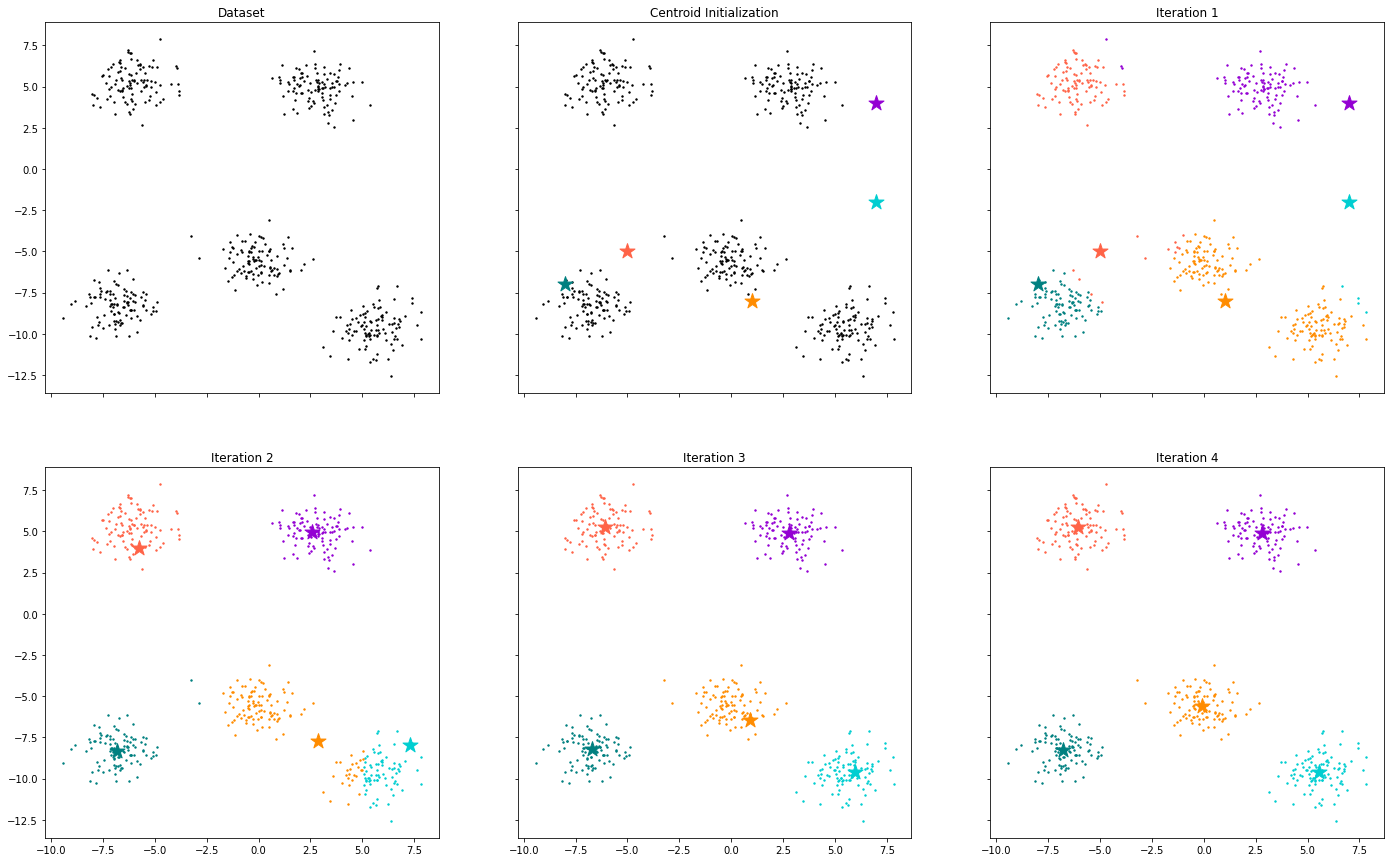

In [5]:
#Lets create a 6 panel plot showing how the cluster centroids evolve with each iteration
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(24, 15)

#DATAPOINTS
axs[0, 0].scatter(X[:,0],X[:,1], s = 2, c = 'black')
axs[0, 0].set_title('Dataset')

#CENTROID INITIALIZATION
#Lets call our function that intializes the centroids
initializeClusterCentroids()

#Now, lets plot the centroids it has initalized
axs[0, 1].set_title('Centroid Initialization')
axs[0, 1].scatter(X[:, 0], X[:, 1], s = 2, c = 'black')
for i in range(k):#for all the clusters
    center = clusters[i]['center'] #its cluster's center
    axs[0, 1].scatter(center[0], center[1], c=clusters[i]['color'], s=250, marker="*")

#CLUSTERING EPOCH 1
axs[0, 2].set_title('Iteration 1')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[0, 2])
updateCluster(clusters)

#CLUSTERING EPOCH 2
axs[1, 0].set_title('Iteration 2')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 0])
updateCluster(clusters)

#CLUSTERING EPOCH 3
axs[1, 1].set_title('Iteration 3')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 1])
updateCluster(clusters)

#CLUSTERING EPOCH 4
axs[1, 2].set_title('Iteration 4')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 2])
updateCluster(clusters)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

## **Using KMeans++ from sklearn**
Lets take a look at the package we are going to be using on our real world dataset. We will go over its usage and functionaities in this section.

In [6]:
from sklearn.cluster import KMeans
#Check out all functionalities at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

kmeans_demo = KMeans(n_clusters=5) #random centroid intialization
#kmeans_demo = KMeans() #What if we dont initialize the number of clusters?
#kmeans_demo = KMeans(n_clusters=5, init='k-means++') #Does smart centroid initialization help?

#Let us fit our synthetic datapoints into the kmeans object
kmeans_demo.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

INERTIA = 872.8554968701876
ITERATIONS TO CONVERGE = 2
CLUSTER CENTROIDS = 
[[ 2.78561142  4.93182424]
 [-0.06909909 -5.56399319]
 [-6.78567723 -8.26282547]
 [ 5.56873506 -9.60861515]
 [-6.06533341  5.2400571 ]]



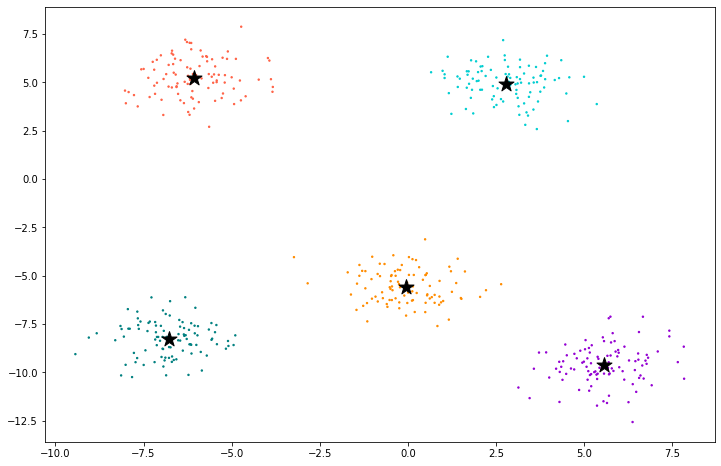

In [7]:
#Lets inspect the clustering model
print("INERTIA = " + str(kmeans_demo.inertia_))
print("ITERATIONS TO CONVERGE = " + str(kmeans_demo.n_iter_))
print("CLUSTER CENTROIDS = ")
print(str(kmeans_demo.cluster_centers_))
print()

#using the colours we defined for the clusters at the start
colors_toplot = []
for label in kmeans_demo.labels_:
  colors_toplot.append(color[label])

plt.scatter(X[:,0], X[:, 1], c = colors_toplot, s=2)
plt.scatter(kmeans_demo.cluster_centers_[:,0], kmeans_demo.cluster_centers_[:,1], c = 'black', s=250, marker = "*")
plt.gcf().set_size_inches(12,8)
plt.show()

In [8]:
#Let us try this out without defining the cluster counts and see what the optimal number of clusters are
kmeans_demo2 = KMeans() #What if we dont initialize the number of clusters?

#Let us fit our synthetic datapoints into the kmeans object
kmeans_demo2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

INERTIA = 677.7970016102311
ITERATIONS TO CONVERGE = 12
CLUSTER CENTROIDS = 
[[ -0.67745726  -5.2995251 ]
 [  1.87912695   5.25776783]
 [ -6.06533341   5.2400571 ]
 [  6.321178    -8.97875638]
 [ -6.78567723  -8.26282547]
 [  5.02386258 -10.06471977]
 [  0.77101457  -5.92921103]
 [  3.4155413    4.70532106]]



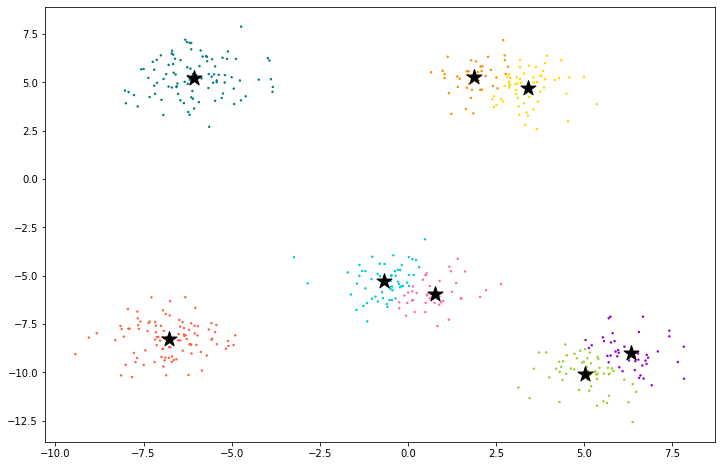

In [9]:
#Lets inspect the clustering model
print("INERTIA = " + str(kmeans_demo2.inertia_))
print("ITERATIONS TO CONVERGE = " + str(kmeans_demo2.n_iter_))
print("CLUSTER CENTROIDS = ")
print(str(kmeans_demo2.cluster_centers_))
print()

#using the colours we defined for the clusters at the start
colors_toplot = []
for label in kmeans_demo2.labels_:
  colors_toplot.append(color[label])

plt.scatter(X[:,0], X[:, 1], c = colors_toplot, s=2)
plt.scatter(kmeans_demo2.cluster_centers_[:,0], kmeans_demo2.cluster_centers_[:,1], c = 'black', s=250, marker = "*")
plt.gcf().set_size_inches(12,8)
plt.show()

Thats interesting! Even though the data visually has 5 clusters, KMeans has found 8 to be the optimal number of clusters!

> **📚 HOMEWORK**<br>
Try this out with different combination of parameters on KMeans(). You can find the extensive list of parameter options at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

## **Mall Customers Dataset**

You are a Marketing Business Analyst at MALLA, a premium mall in New York City, NY. Can you use clustering to identify marketing strategies?

Through a loyalty program, your company has collected some information on your patrons such as **age, gender, annual income**. The team has also defined a metric "**Spending Score**" based on the customers spend frequency and history. This value ranges from 1 - 100 and the higher this value is, the more valuable this customer is to your company (ie) the objective is to maximize this value.

You have been assigned the task to
1. Understand the patrons who have signed up for the loyalty program
2. Identify segments of the customers
3. Strategize and provide incentives to certain segments to increase their "Spending Score"

The dataset we will be using a Mall Customers dataset from Kaggle for this task - https://www.kaggle.com/mavihs08/mall-customers-dataset

To user this data in the Python Notebook, please do the following steps:
1. Go to http://bit.ly/introtoadvml-week2-data, download the dataset and unzip it.
2. In the left panel of Google Colab, go to folder (3rd option) and upload (1st option). Select a_Mall_Customers.csv and upload it.

<div>
<img src="https://github.com/WomenWhoCode/WWCodeDataScience/blob/master/Intro_to_Advanced_MachineLearning/Colab_UploadData.png?raw=true" width="300"/>
</div>

3. In the left panel of Google Colab, right click on a_Mall_Customers.csv and 'Copy Path'. Paste this value into MALL_CUSTOMERS_FILE variable in the cell below.

In [10]:
MALL_CUSTOMERS_FILE = "/content/a_Mall_Customers.csv"

In [11]:
#Import the necessary packages
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv("/content/a_Mall_Customers.csv")
data.shape

(200, 5)

In [13]:
data.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


Since clustering plots values in a n-dimensional space, it is tougher to visualize and validate results from higher dimension spaces. With respect to this usecase, there are 3 numerical columns we can use for clustering. Gender can also be converted to a numerical value if you'd like.

For each feature combination, we will find the optimal value for 'k' using the elbow method and visualize the results from our k-means model. Based on the visualization, we will attempt to derive business insight which will be useful for your company.

**Feature combinations we will try out:**
1. Annual Income, Spending Score
2. Age, Spending Score
3. Age, Annual Income and Spending Score

### **Annual Income and Spending Score**

In [14]:
#Let us consider x = Annual Income and y = Spending Score as the coordinates for clustering
#This is in column 3 and 4 of the dataset, we will access it with the index
coordinates1 = data.iloc[:, [3, 4]].values
coordinates1[:3]

array([[15, 39],
       [15, 81],
       [16,  6]])

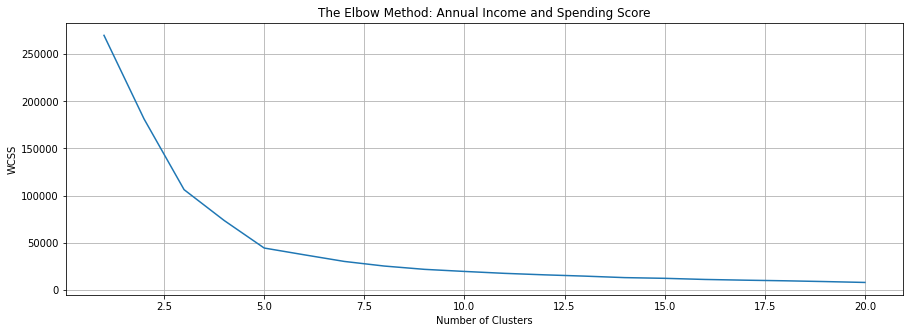

In [15]:
#ELBOW METHOD to derive the optimal value 'k' for your dataset
wcss1 = [] 

#We are going to build clutering models for k = 1 to 20
for i in range(1,21):
    #'k-means++' : smart centroid initialization technique
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(coordinates1)
    wcss1.append(kmeans.inertia_) 

plt.plot(range(1,21), wcss1)

plt.title('The Elbow Method: Annual Income and Spending Score')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.gcf().set_size_inches(15,5)
plt.show()



> **Optimal value for k**: We pick k to be 5



In [16]:
#Lets build our optimized clusters
kmeans1 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
coordinates1_pts = kmeans1.fit_predict(coordinates1)
#coordinates1_pts #uncomment to print the predictions

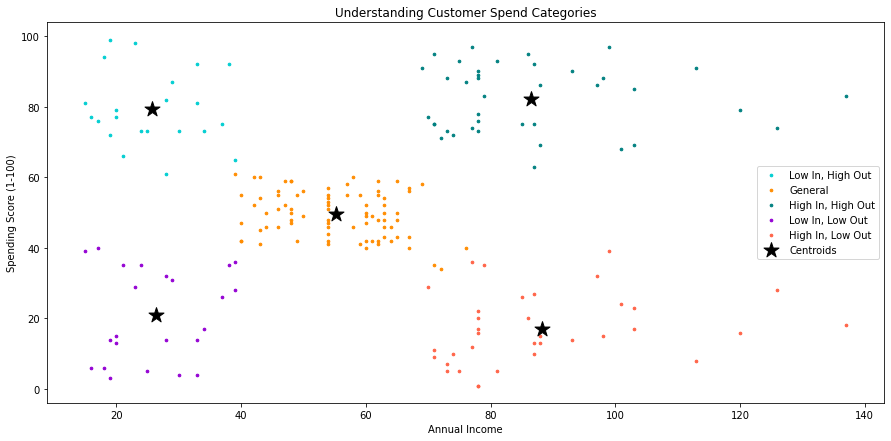

In [17]:
plt.scatter(coordinates1[coordinates1_pts == 0, 0], coordinates1[coordinates1_pts == 0, 1], s = 7, c = color[0], label = 'Low In, High Out')
plt.scatter(coordinates1[coordinates1_pts == 1, 0], coordinates1[coordinates1_pts == 1, 1], s = 7, c = color[1], label = 'General')
plt.scatter(coordinates1[coordinates1_pts == 2, 0], coordinates1[coordinates1_pts == 2, 1], s = 7, c = color[2], label = 'High In, High Out')
plt.scatter(coordinates1[coordinates1_pts == 3, 0], coordinates1[coordinates1_pts == 3, 1], s = 7, c = color[3], label = 'Low In, Low Out')
plt.scatter(coordinates1[coordinates1_pts == 4, 0], coordinates1[coordinates1_pts == 4, 1], s = 7, c = color[4], label = 'High In, Low Out')
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], marker="*", s = 250, c = 'black', label = 'Centroids')
plt.title('Understanding Customer Spend Categories',fontsize=12)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.gcf().set_size_inches(15,7)
plt.show()

> **Business Insight:** We identify 5 clusters/segments of customers in the mall when we analyze it based on the customers annual income and spending score. Based on the clusters we see here, here are 2 areas of opportunities
1. **High In, Low Out** - These customers have the income to spend in the mall and arent spending due to a variety of reasons (not aware of the stores, not interested, etc. Marketing strategies should be targetted towards this cluster.
2. **Low In, High Out** - These customers have a high spend score with the mall even though they have a lower annual income. Providing additional incentives to this cluster will ensure they continue being a valuable customer.

This visual was easy to analyze and we could draw insights with general knowledge and some basic knowledge of our customers.

### **Age and Spending Score**

In [18]:
#Let us consider x = Age and y = Spending Score as the coordinates for clustering
#This is in column 2 and 4 of the dataset, we will access it with the index
coordinates2 = data.iloc[:, [2, 4]].values
coordinates2[:3]

array([[19, 39],
       [21, 81],
       [20,  6]])

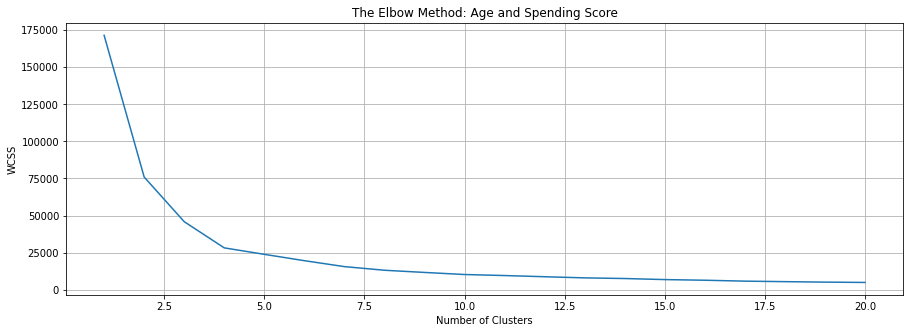

In [19]:
#ELBOW METHOD to derive the optimal value 'k' for your dataset
wcss2 = [] 

#We are going to build clutering models for k = 1 to 20
for i in range(1,21):
    #'k-means++' : smart centroid initialization technique
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(coordinates2)
    wcss2.append(kmeans.inertia_) 
plt.plot(range(1,21), wcss2)

plt.title('The Elbow Method: Age and Spending Score')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.gcf().set_size_inches(15,5)
plt.grid()
plt.show()

> **Optimal value for k**: We pick k to be 4

In [20]:
kmeans2 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
coordinates2_pts = kmeans2.fit_predict(coordinates2)
#coordinates2_pts #uncomment to print the predictions

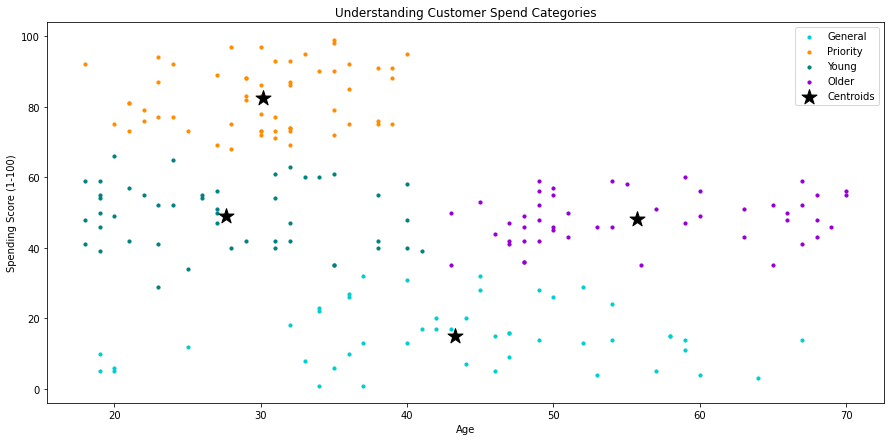

In [21]:
plt.scatter(coordinates2[coordinates2_pts == 0, 0], coordinates2[coordinates2_pts == 0, 1], s = 10, c = color[0], label = 'General')
plt.scatter(coordinates2[coordinates2_pts == 1, 0], coordinates2[coordinates2_pts == 1, 1], s = 10, c = color[1], label = 'Priority')
plt.scatter(coordinates2[coordinates2_pts == 2, 0], coordinates2[coordinates2_pts == 2, 1], s = 10, c = color[2], label = 'Young')
plt.scatter(coordinates2[coordinates2_pts == 3, 0], coordinates2[coordinates2_pts == 3, 1], s = 10, c = color[3], label = 'Older')
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], marker="*", s = 250, c = 'black', label = 'Centroids')
plt.title('Understanding Customer Spend Categories',fontsize=12)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.gcf().set_size_inches(15,7)
plt.legend()
plt.show()

> **Business Insight:** We identify 4 clusters/segments of customers in the mall when we analyze it based on the customers age and spending score. Based on the clusters we see here, here are 2 areas of opportunities
1. **General** - There is a general population of people who regardless of age have a low spending score with your mall. Marketing strategies can be built for this group to be age-agnostic.
2. **Older** - We have a cluster of older population with a mid-level spending score with your mall. On average, this population tends to have/had a higher annual income than the younger population and would be great targets for marketing campaigns. You need to ensure that your company is inclusive of the older population and targets ads towards them to increase their spend score.

This visual was easy to analyze and we could draw insights with general knowledge and some basic knowledge of our customers.

### **Age, Annual Income and Spending Score**

In [22]:
#Let us consider x = Age and y = Annual Income and z = Spending Score as the coordinates for clustering
#This is in column 2, 3, 4 of the dataset, we will access it with the index
coordinates3 = data.iloc[:, [2, 3, 4]].values
coordinates3[:2]

array([[19, 15, 39],
       [21, 15, 81]])

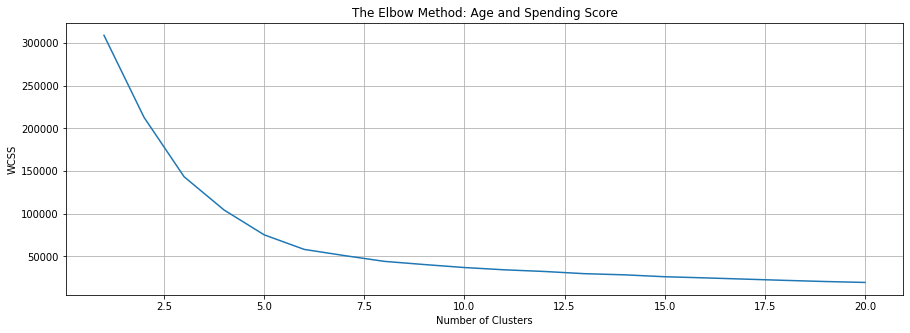

In [23]:
#ELBOW METHOD to derive the optimal value 'k' for your dataset
wcss3 = [] 

#We are going to build clutering models for k = 1 to 20
for i in range(1,21):
    #'k-means++' : smart centroid initialization technique
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(coordinates3)
    wcss3.append(kmeans.inertia_) 
plt.plot(range(1,21), wcss3)

plt.title('The Elbow Method: Age and Spending Score')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.gcf().set_size_inches(15,5)
plt.grid()
plt.show()

> **Optimal value for k**: We pick k to be 6

In [24]:
kmeans3 = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
coordinates3_pts = kmeans3.fit_predict(coordinates3)
#coordinates3_pts #uncomment to print the predictions

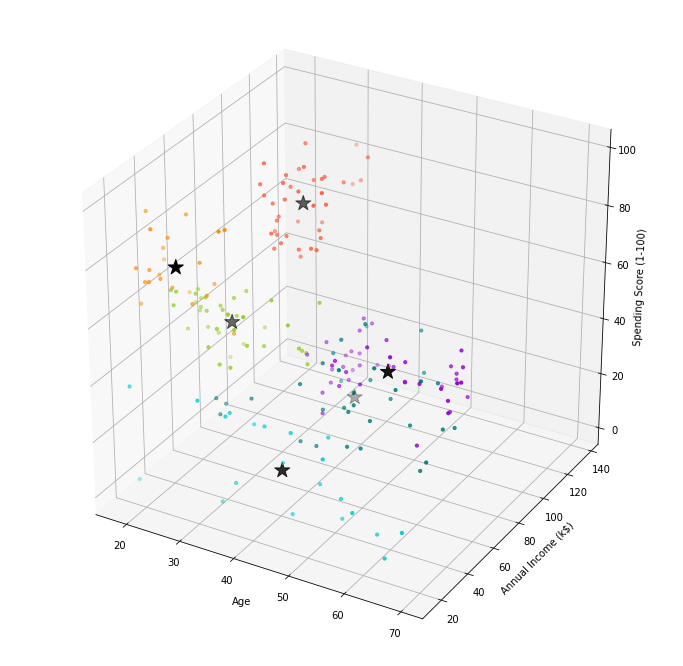

In [25]:
ax = plt.axes(projection='3d')
plt.gcf().set_size_inches(12,12)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)');

ax.scatter3D(coordinates3[coordinates3_pts == 0, 0], coordinates3[coordinates3_pts == 0, 1], coordinates3[coordinates3_pts == 0, 2], c = color[0], s = 10);
ax.scatter3D(coordinates3[coordinates3_pts == 1, 0], coordinates3[coordinates3_pts == 1, 1], coordinates3[coordinates3_pts == 1, 2], c = color[1], s = 10);
ax.scatter3D(coordinates3[coordinates3_pts == 2, 0], coordinates3[coordinates3_pts == 2, 1], coordinates3[coordinates3_pts == 2, 2], c = color[2], s = 10);
ax.scatter3D(coordinates3[coordinates3_pts == 3, 0], coordinates3[coordinates3_pts == 3, 1], coordinates3[coordinates3_pts == 3, 2], c = color[3], s = 10);
ax.scatter3D(coordinates3[coordinates3_pts == 4, 0], coordinates3[coordinates3_pts == 4, 1], coordinates3[coordinates3_pts == 4, 2], c = color[4], s = 10);
ax.scatter3D(coordinates3[coordinates3_pts == 5, 0], coordinates3[coordinates3_pts == 5, 1], coordinates3[coordinates3_pts == 5, 2], c = color[5], s = 10);

ax.scatter3D(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], kmeans3.cluster_centers_[:, 2], marker="*", s = 250, c = 'black', label = 'Centroid')
plt.show()

If you see this visual, within each cluster colour, there are different shades. This denotes the depth at which the point is based on the graph since it is 3D. As we start working with datasets in a higher dimension, the complexity of identifying and labeling clusters increases.

When it comes to **higher dimensional clustering** **algorithms**, it is tougher to visualize the data and see how well the clustering model is identifying clusters. From the 2D and 3D visual, we can confidently say that **KMeans identifies clusters and estimates the number of clusters well.**

> **📚 HOMEWORK**<br>
1. Can you try using gender to analyze and cluster your customers?
2. Identify 5 target populations in this dataset to which you can apply marketing strategies.